# Gaussian Barycenter Computation

In [1]:
from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 
import itertools

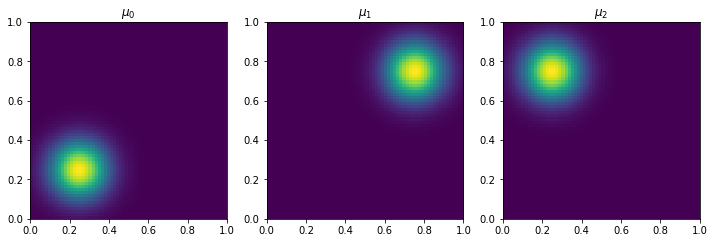

In [2]:
# Grid of size n1 x n2
n1 = 64   # x axis
n2 = 64  # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

positions = np.array([[0.25,0.25],
                      [ 0.75,0.75],
                      [0.25,0.75]])

true_loc = np.mean(positions,axis=0)

# measures = [None]*len(positions)
measures = [None]*(len(positions))

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i] = np.exp(-0.5*((x-xc)**2 + (y-yc)**2)*100.0)
    measures[i][measures[i]<1e-4] = 0.0 

    measures[i] *= n1*n2 / np.sum(measures[i])

true_cost = 0.5/3.0*(np.linalg.norm(true_loc-positions[0])**2 \
          + np.linalg.norm(true_loc-positions[1])**2 \
          + np.linalg.norm(true_loc-positions[2])**2)

fig, ax = plt.subplots(1, len(measures), figsize=(12,4))
for i in range(len(measures)):
    ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
    ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

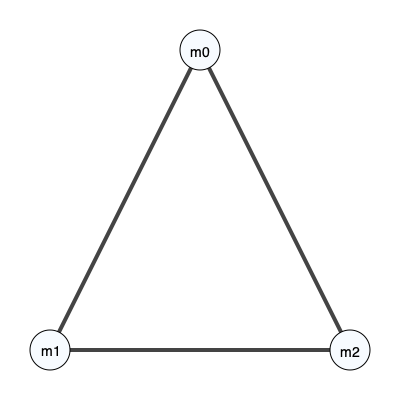

In [3]:
unroll_node = 0

# The set A that defines the pairwise costs
edge_list = [[0,1], [1,2], [0,2]]

bary_weights = np.array([1.0,1.0,1.0])
bary_weights /= np.sum(bary_weights)

prob = MMOTSolver(measures, edge_list, x, y, unroll_node, bary_weights)

prob.Visualize('original', filename='CostGraph.svg')

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   0.2500,  2.2802e-03,   1.3033e+00,         2
       10,   0.0028,  5.4200e-02,   7.2254e-02,         4
       20,   0.0267,  5.4673e-02,   2.3606e-03,         0
       30,   0.0321,  5.4718e-02,   6.3178e-04,         0
       40,   0.0032,  5.4743e-02,   8.2541e-04,         0
       50,   0.0077,  5.4752e-02,   2.6444e-04,         0
       60,   0.0093,  5.4760e-02,   2.3613e-04,         0
       70,   0.0223,  5.4765e-02,   1.4763e-04,         0
       80,   0.0179,  5.4769e-02,   1.7285e-04,         0
       90,   0.0286,  5.4772e-02,   9.5690e-05,         0
      100,   0.0014,  5.4774e-02,   1.5146e-04,         0
      110,   0.0034,  5.4776e-02,   1.2462e-04,         0
      120,   0.0220,  5.4778e-02,   1.1507e-04,         0
      126,   0.0052,  5.4779e-02,   7.7367e-05,         0
Terminating due to small change in objective.


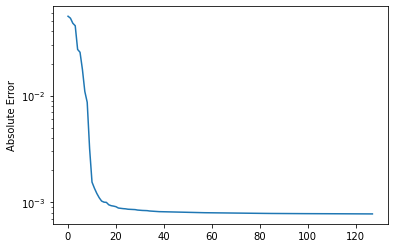

In [4]:
dual_vars = [np.zeros(x.shape) for i in range(prob.NumDual())]

res = prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-8, gtol_abs=1e-8, root_nodes='all')

plt.figure()
plt.semilogy(np.abs(res.costs-true_cost))
plt.ylabel('Absolute Error')
plt.show()

In [5]:
bary = prob.Barycenter(res.dual_vars)

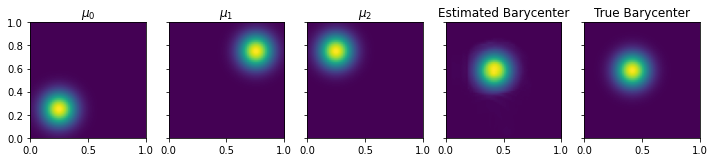

In [6]:
vmax = np.max(measures[0])
fig, axs = plt.subplots(1, len(measures)+2, figsize=(12,4), sharey=True)
for i in range(len(measures)):
    axs[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))#, vmin=0, vmax=vmax)
    axs[i].set_title("$\\mu_{{ {:0d} }}$".format(i))
    
axs[-2].imshow(bary, origin='lower', extent=(0,1,0,1))#, vmin=0, vmax=vmax)
axs[-2].set_title('Estimated Barycenter')

true_bary = np.zeros((n2, n1))
true_bary = np.exp(-0.5*((x-true_loc[0])**2 + (y-true_loc[1])**2)*100.0)
true_bary *= n1*n2 / np.sum(true_bary)

axs[-1].imshow(true_bary, origin='lower', extent=(0,1,0,1))#, vmin=0, vmax=vmax)
axs[-1].set_title('True Barycenter')

plt.show()

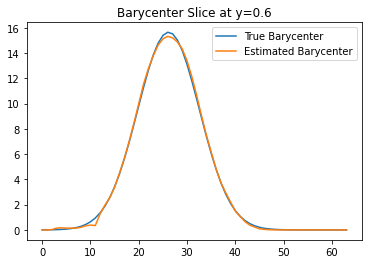

In [7]:
plt.plot(true_bary[int(0.6*n1),:],label='True Barycenter')
plt.plot(bary[int(0.6*n1),:],label='Estimated Barycenter')
plt.title('Barycenter Slice at y=0.6')
plt.legend()
plt.show()